<a href="https://colab.research.google.com/github/JungYuDam/database/blob/main/202211824_%EC%A0%95%EC%9C%A0%EB%8B%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from pandas import DataFrame

file_path ='/content/drive/MyDrive/데분프/transfermarkt50.xlsx'
df= pd.read_excel(file_path)
df=df.rename(columns={'postion':'position'}) #postion을 position으로 바꾸기
df = df.set_index('number') #인덱스를 number로 바꾸기
print(df)

                           name            position  age        nation  \
number                                                                   
1                 Kylian Mbappé      Centre-Forward   22        France   
2                        Neymar         Left Winger   28        Brazil   
3                    Sadio Mané         Left Winger   28       Senegal   
4                 Mohamed Salah        Right Winger   28         Egypt   
5                    Harry Kane      Centre-Forward   27       England   
6               Kevin De Bruyne  Attacking Midfield   29       Belgium   
7        Trent Alexander-Arnold          Right-Back   22       England   
8               Raheem Sterling         Left Winger   26       England   
9                    João Félix      Second Striker   21      Portugal   
10               Erling Haaland      Centre-Forward   20        Norway   
11                 Jadon Sancho        Right Winger   20       England   
12                 Lionel Messi       

In [52]:
df=df.sort_values(by=['number','age','value'],ascending=[True,True,False])
print(df)

                           name            position  age        nation  \
number                                                                   
1                 Kylian Mbappé      Centre-Forward   22        France   
2                        Neymar         Left Winger   28        Brazil   
3                    Sadio Mané         Left Winger   28       Senegal   
4                 Mohamed Salah        Right Winger   28         Egypt   
5                    Harry Kane      Centre-Forward   27       England   
6               Kevin De Bruyne  Attacking Midfield   29       Belgium   
7        Trent Alexander-Arnold          Right-Back   22       England   
8               Raheem Sterling         Left Winger   26       England   
9                    João Félix      Second Striker   21      Portugal   
10               Erling Haaland      Centre-Forward   20        Norway   
11                 Jadon Sancho        Right Winger   20       England   
12                 Lionel Messi       

In [53]:
df_count = df.team.value_counts()  #team의 분포 비율 카운트
print(df_count)

Liverpool FC           7
Manchester City        6
FC Barcelona           5
Bayern Munich          5
Atlético Madrid        4
Real Madrid            4
Paris Saint-Germain    3
Manchester United      3
Tottenham Hotspur      2
Borussia Dortmund      2
Inter Milan            2
Chelsea FC             2
Juventus FC            2
SS Lazio               1
Everton FC             1
Real Sociedad          1
Name: team, dtype: int64


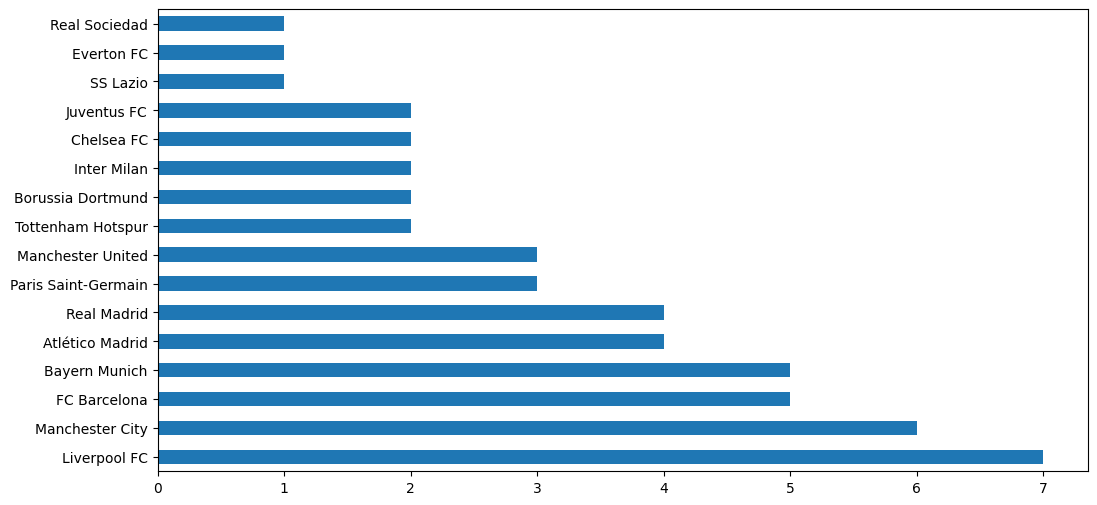

In [54]:
df = df['team'].value_counts().plot(kind='barh', figsize=(12,6))  #위의 team의 분포비율을 막대그래프로 표현

In [55]:
# 단일표본 T-분석에는 scipy의 ttest_1samp 메서드를 이용
from scipy.stats import ttest_1samp

df = pd.read_excel("/content/drive/MyDrive/데분프/transfermarkt50.xlsx")

# 선수들의 나이 정보를 이용 (결측값은 제거합니다.)
ages = df["age"].dropna()

# 평균을 계산할 집단의 변수인 age와 비교 대상 값인 30을 ttest_1samp의 파라미터로 전달하여 p값을 계산
_, p_value = ttest_1samp(ages, 30)

# 유의수준을 0.01로 선택
a = 0.01

# p값이 유의수준보다 작은 경우 귀무가설을 기각
if p_value < a:
  print(f"P-value [{p_value}] < Significant level [{a}]; H1 is accepted.")
else:
  print(f"P-value [{p_value}] >= Significant level [{a}]; H0 is accepted.")

# 결과를 보면, p값이 유의수준보다 크기 때문에 대립가설을 받아들입니다.
# 따라서, 이 분석의 결론은 "50명의 선수들의 평균 나이는 30세가 아니다"가 됩니다.

print(ages.mean())

P-value [1.0000517328957746e-14] < Significant level [0.01]; H1 is accepted.
25.12


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 주어진 데이터를 이용해 예측
# 범주형 변수의 인코딩은 원-핫 인코딩
# test set의 비율은 0.2
# 평가지표로는 MSE, RMSE

df3 = df.copy(deep = True)

X = df3.drop(columns=["team", "age"])
y = df3["age"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MSE : 17.228350221432933
RMSE : 4.150704786109575


In [57]:
import pandas as pd
from scipy.stats import chi2_contingency
#카이제곱 검정

data = df
df = pd.DataFrame(data)

# 국적과 팀의 국적에 대한 교차표 생성
contingency_table = pd.crosstab(df['nation'], df['team'])

# 카이제곱 검정 수행
chi2, p, _, _ = chi2_contingency(contingency_table)

# p값이 유의수준보다 작은 경우 귀무가설을 기각합니다.
if p_value < a:
  print(f"P-value [{p_value}] < Significant level [{a}]; H1 is accepted.")
else:
  print(f"P-value [{p_value}] >= Significant level [{a}]; H0 is accepted.")

# 결과 출력
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")


P-value [1.0000517328957746e-14] < Significant level [0.01]; H1 is accepted.
Chi-square value: 287.33560090702946
P-value: 0.22387977601271522


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#value'를 기준으로 팀의 시장 가치가 특정 기준 이상인지 이하인지를 예측

# 'value' 열에서 화폐 단위와 문자 'm'을 제거하고 숫자로 변환
df['value'] = df['value'].replace('[\€,m]', '', regex=True).astype(float)

# 특정 값 이상인 행 선택
selected_rows = df[df['value'] > 80]

df['value_binary'] = df['value'].apply(lambda x: 1 if x > 80 else 0)

# 특징 변수(X)와 타겟 변수(y) 설정
X = df[['age']]
y = df['value_binary']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화
model = LogisticRegression()

# 모델을 훈련 데이터로 훈련
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.80
Confusion Matrix:
[[8 0]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#value'를 기준으로 팀의 시장 가치가 특정 기준 이상인지 이하인지를 예측
#Decision Tree

df['value_binary'] = df['value'].apply(lambda x: 1 if x > 80 else 0)

# 특징 변수(X)와 타겟 변수(y) 설정
X = df[['age']]
y = df['value_binary']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 초기화
model = DecisionTreeClassifier(random_state=42)

# 모델을 훈련 데이터로 훈련
tr = model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.70
Confusion Matrix:
[[7 1]
 [2 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10



Accuracy: 0.10
Confusion Matrix:
[[0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]]
Classification Report:
                    precision    recall  f1-score   support

  Central Midfield       0.00      0.00      0.00         1
       Centre-Back       0.00      0.00      0.00         1
    Centre-Forward       0.00      0.00      0.00         3
Defensive Midfield       0.00      0.00      0.00         2
       Left Winger       0.10      1.00      0.18         1
         Left-Back       0.00      0.00      0.00         1
      Right Winger       0.00      0.00      0.00         1

          accuracy                           0.10        10
         macro avg       0.01      0.14      0.03        10
      weighted avg       0.01      0.10      0.02        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


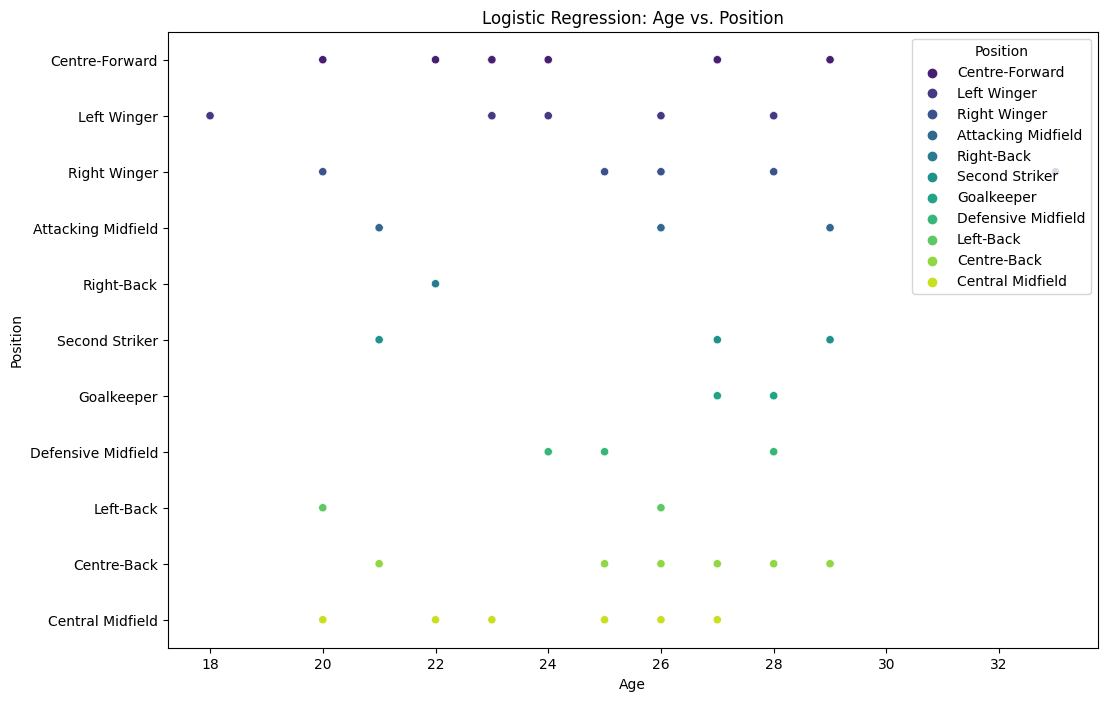

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Logistic Regression을 Multi-class Classification에 이용

# 특징 변수(X)와 타겟 변수(y) 설정
X = df[['age']]
y = df['postion']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 클래스 로지스틱 회귀 모델 초기화
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# 모델을 훈련 데이터로 훈련
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='postion', data=df, hue='postion', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Position')
plt.title('Logistic Regression: Age vs. Position')
plt.legend(title='Position', loc='upper right')
plt.show()
